### Adjust time courses to simple exponential


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Condition 1
R² = 0.990
% signal = 34.877 ± 0.404
k = 0.00013 ± 0.00001

Condition 2
R² = 0.990
% signal = 33.503 ± 0.912
k = 0.00064 ± 0.00004

Condition 3
R² = 0.998
% signal = 45.162 ± 0.632
k = 0.00062 ± 0.00002



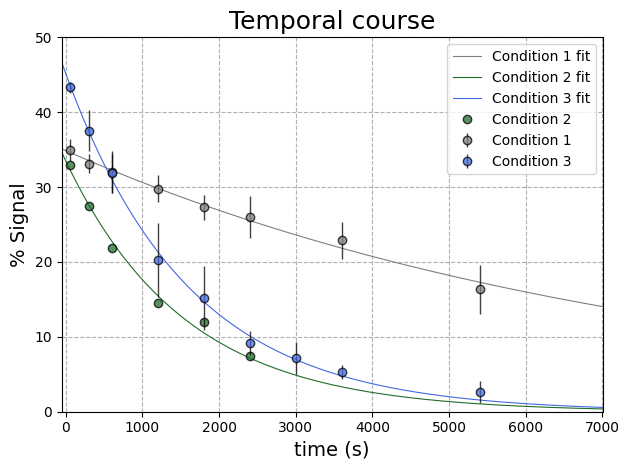

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def monoExp(x, signal_init, k):
    return signal_init * np.exp(-k * x)

def fit_and_report(x_data, y_data, color, label, ax, x_range):
    params, covariance = curve_fit(monoExp, x_data, y_data, p0=[0.3, 0.001])
    signal_init, k = params
    rSquared = 1 - np.sum((y_data - monoExp(x_data, *params))**2) / np.sum((y_data - np.mean(y_data))**2)
    std_error = np.sqrt(np.diag(covariance))
    print(f"\033[1m{label}\033[0m\nR² = {rSquared:.3f}")
    print(f"% signal = {signal_init:.3f} ± {std_error[0]:.3f}\nk = {k:.5f} ± {std_error[1]:.5f}\n")
    ax.plot(x_range, monoExp(np.array(x_range), *params), linewidth=0.8, c=color, label=f"{label} fit")
    return params, rSquared, std_error

# Load data
xls = pd.ExcelFile('time_course_data.xlsx') # Update with your file path
df = pd.read_excel(xls, header=1, sheet_name=0)

fig, ax = plt.subplots()

# Fit and plot each dataset; indicate the columns where data is located
fit_and_report(df.iloc[:8, 3], df.iloc[:8, 4], 'grey', 'Condition 1', ax, range(-300,8000)) # update labels
fit_and_report(df.iloc[:6, 6], df.iloc[:6, 7], '#206e28', 'Condition 2', ax, range(-300,8000))
fit_and_report(df.iloc[:9, 0], df.iloc[:9, 1], 'royalblue', 'Condition 3', ax, range(-300,8000))

# Add error bars and scatter plots
ax.errorbar(df.iloc[:8, 3] , df.iloc[:8, 4] , yerr= df.iloc[:8, 5] , label='Condition 1' ,markersize= 6, c='grey',alpha = 0.75, markeredgecolor='black', fmt='o', ecolor='black',elinewidth=1)
ax.plot(df.iloc[:6, 6], df.iloc[:6, 7], '.', c = '#206e28', markersize= 12, label = 'Condition 2', markeredgecolor='black', alpha=0.75)
ax.errorbar(df.iloc[:9, 0] , df.iloc[:9, 1] , yerr= df.iloc[:9, 2] , label='Condition 3' ,markersize= 6, c='royalblue',alpha = 0.75, markeredgecolor='black', fmt='o', ecolor='black',elinewidth=1)

ax.set_title("Temporal course", fontsize=18)
ax.set_ylim(0, 50)
ax.set_xlim(-50,7000)
ax.set_xlabel('time (s)', fontsize=14)
ax.set_ylabel('% Signal', fontsize=14)
ax.legend()
ax.grid(True, linestyle='--')
plt.tight_layout()

#plt.savefig('time_course_fit.svg') # Uncomment to save the figure